<a href="https://colab.research.google.com/github/EAFIT-BI/Supervised-Learning-2025-I/blob/main/Regresi%C3%B3n_no_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión no lineal

Dentro de las regresiones no lineales, tenemos la regresió polinómica y la regresión logística. La primera se orienta a la tarea de regresión y la segunda a la tarea de clasificación. El formato de la regresión no lineal es el siguiente:

$$ y_i = f(x_{i})$$

## Regresión polinómica

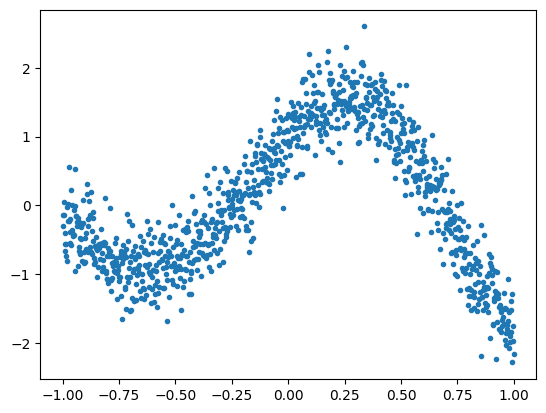

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos la matriz de entrada. Iniciamos solo con una variable
x = np.linspace(-1, 1, 1000) # generamos un vector desde -1 hasta 1 con
# 1000 muestras (espaciamiento de 0.002 entre observaciones)

# Generamos un vector de ruido para que la salida tengo algo de aleatoriedad
ruido = np.random.normal(0, 0.333, 1000) #media 0, varianza 0.333 y 1000 datos

# Generamos el vector de salida, esto es, la variable objetivo
y = np.sin(4*x)+ np.cos(3*x) + ruido

# Visualizamos los datos generados (el toyset)
plt.plot(x, y, '.')
plt.show()

In [7]:
# Generamos la matriz de entrenamiento polinomial
from sklearn.preprocessing import PolynomialFeatures

# Instanciamos el preprocesador polinomial
polinomio = PolynomialFeatures(degree = 2, include_bias = True)

# Transformamos el vector de entrada x en su versión polinomial de grado 2
X_p = polinomio.fit_transform(x.reshape(-1, 1))

X_p.shape

(1000, 3)

In [9]:
from sklearn.linear_model import LinearRegression

# Instanciamos el modelo de regresión lineal
modelo_polinomio = LinearRegression()

# Entrenamos y calculamos la métrica de desempeño sobre X
modelo_polinomio.fit(X_p, y)
modelo_polinomio.score(X_p, y)

0.4909466118871568

In [10]:
# Dado que el desempeño se puede mejorar, aumentaremos el grado del polinomio
# Grado 3

polinomio = PolynomialFeatures(degree = 3, include_bias = True)
X_p = polinomio.fit_transform(x.reshape(-1, 1))

modelo_polinomio = LinearRegression()
modelo_polinomio.fit(X_p, y)
modelo_polinomio.score(X_p, y)

0.8414751224153745

In [11]:
# Grado 5

polinomio = PolynomialFeatures(degree = 5, include_bias = True)
X_p = polinomio.fit_transform(x.reshape(-1, 1))

modelo_polinomio = LinearRegression()
modelo_polinomio.fit(X_p, y)
modelo_polinomio.score(X_p, y)

0.8909167367157069

In [15]:
# Grado 7

polinomio = PolynomialFeatures(degree = 7, include_bias = True)
X_p = polinomio.fit_transform(x.reshape(-1, 1))

modelo_polinomio = LinearRegression()
modelo_polinomio.fit(X_p, y)
modelo_polinomio.score(X_p, y)

0.8909837440069731

El hiperparámetro del grado es suceptible de ser sintonizado a través de heurística (cambiando el grado manualmente) o por métodos automatizados. En este caso haremos uso de un ciclo que cambie el grado automáticamente.

In [17]:
from sklearn.pipeline import Pipeline

# Primero instanciamos el pipeline
pipe = Pipeline([('polinomio', PolynomialFeatures(include_bias = True)),
                 ('modelo', LinearRegression())])

# Segundo establecemos los posibles valores que puede tomar el grado del polinomio
grados = range(2,15)

# Creamos listas vacías para almacenar temporalmente los resultados
score = []

for grado in grados:
  score.append(pipe.set_params(polinomio__degree =
                               grado).fit(x.reshape(-1,1),
                                          y).score(x.reshape(-1, 1), y))

In [18]:
# De acuerdo al vector de métricas, el valor más adecuado será el del
# grado 5 aproximadamente.

[0.4909466118871568,
 0.8414751224153745,
 0.8701552333955913,
 0.8909167367157069,
 0.8909200089452128,
 0.8909837440069731,
 0.8914537617357736,
 0.8915429346715045,
 0.8918332585292581,
 0.8918609689827853,
 0.8918961772461298,
 0.8919614601975646,
 0.8919766101099796]

## Validación del modelo

Hasta ahora sintonizamos el hiperparámetro con el conjunto inicial, qué pasaría con la métrica de desempeño si generamos un conjunto de test.

In [19]:
# Generamos el conjunto de test
x_test = np.linspace(-0.9, 1.1, 100)
ruido = np.random.normal(0, 0.333, 100)
y_test = np.sin(4*x_test)+ np.cos(3*x_test) + ruido

In [20]:
# Creamos el pipeline para incorporar el test

# Primero instanciamos el pipeline
pipe = Pipeline([('polinomio', PolynomialFeatures(include_bias = True)),
                 ('modelo', LinearRegression())])

# Segundo establecemos los posibles valores que puede tomar el grado del polinomio
grados = range(2,15)

# Creamos listas vacías para almacenar temporalmente los resultados
score_train = []
score_test = []

for grado in grados:
  score_train.append(pipe.set_params(polinomio__degree =
                               grado).fit(x.reshape(-1,1),
                                          y).score(x.reshape(-1, 1), y))
  score_test.append(pipe.set_params(polinomio__degree =
                               grado).fit(x.reshape(-1,1),
                                          y).score(x_test.reshape(-1, 1), y_test))

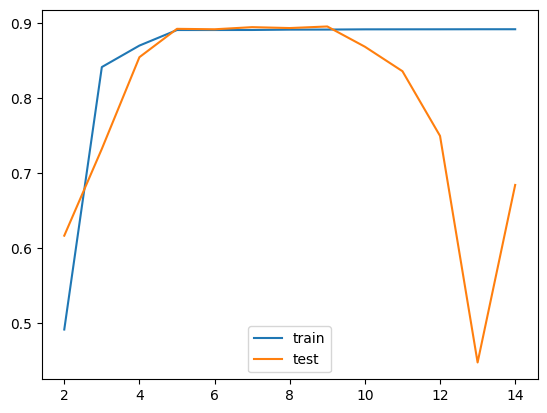

In [21]:
# Graficamos los resultados
plt.plot(grados, score_train, label = 'train')
plt.plot(grados, score_test, label = 'test')
plt.legend()
plt.show()

De acuerdo al gráfico tenemos las siguientes observaciones

>1. La parte inicial del desempeño refleja el **sesgo**, i.e., la parte en la que el modelo es demasido simple para aprender.
>2. La parte cercana al final del gráfico refleja la **varianza**, i.e., el modelo es demasiado complejo para generalizar.
>3. De la parte intermedia donde el desempeño es del deseable, se elige el hiperparámetro de menor valor, debido a que consume menos recursos

¿Qué pasaría si no contamos con dos conjuntos para el entrenamiento y el test?

En ese caso debemos particionar los datos.

In [22]:
from sklearn.model_selection import train_test_split

# Particionamos los datos
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Comprobamos los tamaños del train y del test
X_train.shape, X_test.shape

((700, 1), (300, 1))

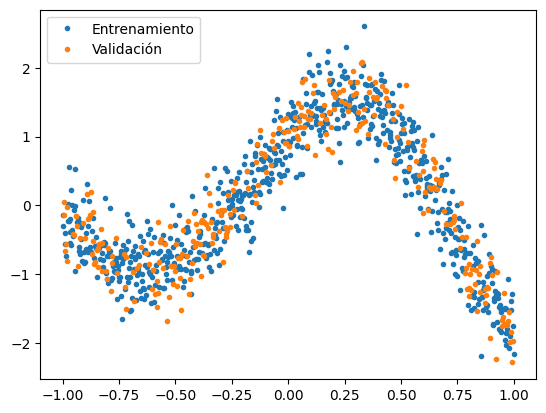

In [23]:
# Gráficamente
plt.plot(X_train, y_train, '.', label = 'Entrenamiento')
plt.plot(X_test, y_test, '.', label = 'Validación')
plt.legend()
plt.show()

In [24]:
# Procedemos con la sintonización de los hiperparámetros

# Ya tenemos instanciado el pipeline, entonces partiremos de
# la inicialización de las listas

score_train = []
score_test = []

for grado in grados:
  score_train.append(pipe.set_params(polinomio__degree =
                               grado).fit(X_train,
                                          y_train).score(X_train, y_train))
  score_test.append(pipe.set_params(polinomio__degree =
                               grado).fit(X_train,
                                          y_train).score(X_test, y_test))


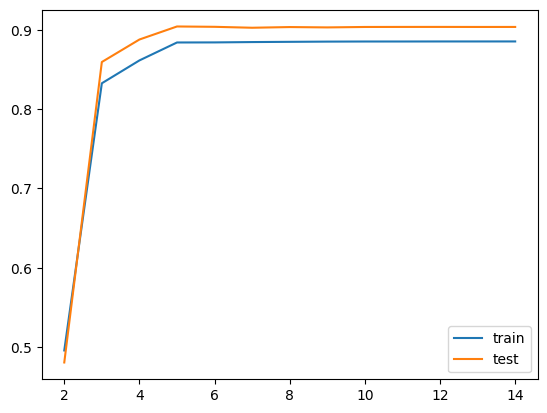

In [25]:
# Graficamos los resultados
plt.plot(grados, score_train, label = 'train')
plt.plot(grados, score_test, label = 'test')
plt.legend()
plt.show()